##### Hello! Welcome to a study of transit stations as it relates to populations.
###### I will be looking at data from around the states and maybe the globe as well! More to come

NYC MTA has 472 Stations -> https://new.mta.info/agency/new-york-city-transit/subway-bus-ridership-2022
NYC has 8,335,897 residents (datacommons.org)

Link Light Rail has 19 stations on line 1 and 8 stations on line 2 -> https://www.soundtransit.org/ride-with-us/stations/link-light-rail-stations
Seattle has 749,256 residents

In [1]:
8333897 / 472

17656.561440677968

In [2]:
749256 / 30

24975.2

In [3]:
##### First step. Try to make a US county map
import matplotlib as plt
import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
from shapely.geometry import Polygon, LineString, Point, mapping

from pygris import counties
from pygris import block_groups
from pygris import linear_water
from pygris.data import get_census


import folium
import folium.plugins as plugins
from folium.plugins import HeatMap, MarkerCluster, HeatMapWithTime, TimeSliderChoropleth

from geojson import Feature, Point, FeatureCollection
import json

In [46]:
'''
us_youth_sahie = get_census(dataset = "timeseries/healthins/sahie",
                            variables = "PCTUI_PT",
                            params = {
                                "for": "county:*",                               
                                "time": 2019,
                                "AGECAT": 4
                            }, 
                            return_geoid = True, 
                            guess_dtypes = True) 
'''



### the acs stuff below works
'''
acs_hopefully = get_census(dataset = '2022/acs/acs1',
                                     variables = 'B08130_020E',
                                     params = {
                                         "for": "zip_code:*"
                                         #"in": "state:53"                                                                        
                                     },
                                     return_geoid = True,
                                     guess_dtypes = True
                                     )
'''

#### all api datasets -> https://www.census.gov/data/developers/data-sets.html
#### specific api -> https://www.census.gov/data/developers/data-sets/popest-popproj.html
#### variables -> https://api.census.gov/data/2017/popproj/pop/variables.json
#### acs 2022 variables -> https://api.census.gov/data/2022/acs/acs1/variables.json

#kingco_tract_populations = get_census(dataset = '2017/popproj/pop',
 #                                    variables = 'POP',
  #                                   params = {
   #                                      "for": "county:*"
                                         #"in": "state:53"                                                                        
    #                                 },
     #                                return_geoid = True,
      #                               guess_dtypes = True
       #                              )

SyntaxError: Request failed. The Census Bureau error message is <!doctype html><html lang="en"><head><title>HTTP Status 404 – Not Found</title><style type="text/css">body {font-family:Tahoma,Arial,sans-serif;} h1, h2, h3, b {color:white;background-color:#525D76;} h1 {font-size:22px;} h2 {font-size:16px;} h3 {font-size:14px;} p {font-size:12px;} a {color:black;} .line {height:1px;background-color:#525D76;border:none;}</style></head><body><h1>HTTP Status 404 – Not Found</h1></body></html> (<string>)

In [42]:
acs_hopefully.head()

,B08130_020E,GEOID
0,1219,53


In [40]:
acs_hopefully.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   B08130_020E  52 non-null     int64 
 1   GEOID        52 non-null     object
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


In [6]:
seattle_blocks = block_groups(state = 'WA', county = 'King', cache = False)

Using the default year of 2021
Using FIPS code '53' for input 'WA'
Using FIPS code '033' for input 'King'


<Axes: >

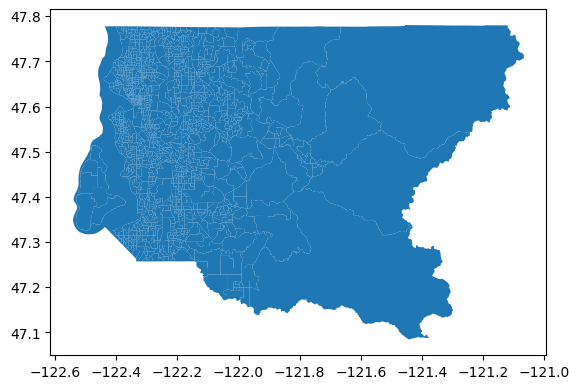

In [7]:
seattle_blocks.plot()